# **Implementation of Decision Tree**

## Step One: Imports and Data Reading

In [ ]:
# Import the standard tools for pythonic data analysis
import csv
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier
from skimage import filters, feature


from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Import files using colab
# Upload the CSV file
from google.colab import files
upload = files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train (1).csv


In [ ]:
from google.colab import files
upload = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test (1).csv


In [ ]:
# Read the CSV file
df = pd.read_csv('fashion-mnist_train.csv')
df2 = pd.read_csv('fashion-mnist_test.csv')

# Get the feature matrix
X_train = df[df.columns[df.columns != 'label']].copy()
X_test = df2[df2.columns[df.columns != 'label']].copy()
# Get the label
y_train = df['label'].copy()
y_test = df2['label'].copy()

# Transform the data into numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
# Transform the labels into lists
y_train = y_train.to_list()
y_test = y_test.to_list()

##Step Two: Implement the Default DT on Raw Images

1.  Implement the Default Decision Tree with max_depth = 'none' and criterion = 'gini'
2.  Find the parameters with best performance on raw images



### 1) The Default Decision Tree

In [ ]:
# The default decision tree
# with criterion = 'gini', max_depth = None, 

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
sc = accuracy_score(y_test, pred)


In [ ]:
print("the accuracy on the test set: ");
print(sc)

the accuracy on the test set: 
0.799


In [ ]:
# its parameters
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dtree.get_depth()

48

### 2) Parameters with best performance

In [ ]:
max_depth = []
acc_gini = []
acc_entropy = []
best = 0
best_index = 0
best_label = ''
for i in range(5,60):

  # set up DecisionTree dtree
  dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)

  # use the DecisionTree to fit data
  dtree.fit(X_train, y_train)
  # get the performance 
  pred = dtree.predict(X_test)
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'gini'
  acc_gini.append(sc)

 ####
  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'entropy'
  acc_entropy.append(sc)
 ####
  max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})

In [ ]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
print(best)
print(best_index)
print(best_label)

## Step Three: Implement the DT on Images Pre-processed (Feature Engineering)

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. 

In this part, data will be pre-processed through the Canny Filter before training the model.

In [ ]:
# Canny filter and combine it with the orginial image

def canny(X_train, X_test):
  # apply canny edge detection to all train and test
  # for each image, we append the edge detected image to the original image
  def apply_canny_filter(img): # img is a 1d array
    # takes 1d img array, applies filter and returns 1d array
    original_img = img.reshape(28,28)
    cannied_img = feature.canny(original_img)
    combined_img = np.concatenate((original_img, cannied_img))
    # plt.imshow(combined_img, cmap = 'Greys') # show concatenated image
    return combined_img.flatten()
  X_train_cannied = list(map(apply_canny_filter, X_train))
  X_test_cannied = list(map(apply_canny_filter, X_test))
  return (X_train_cannied, X_test_cannied)

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

0.8211
12
gini


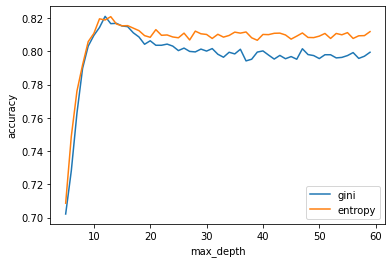

In [ ]:
X_train_cannied, X_test_cannied = canny(X_train, X_test)
max_depth = []
acc_gini = []
acc_entropy = []
best = 0
best_index = 0
best_label = ''
for i in range(5,60):

  # set up DecisionTree dtree
  dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)

  # use the DecisionTree to fit data
  dtree.fit(X_train_cannied, y_train)
  # get the performance 
  pred = dtree.predict(X_test_cannied)
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'gini'
  acc_gini.append(sc)

 ####
  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  dtree.fit(X_train_cannied, y_train)
  pred = dtree.predict(X_test_cannied)
  
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'entropy'
  acc_entropy.append(sc)
 ####
  max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
####
print(best)
print(best_index)
print(best_label)

## Step Four: Combine Different DT models to Find the Best Model 

In order to show the perform of DT models with feature engineering and different parameters. 

Combine the two in the same graph.

In [ ]:
# definition for canny
def canny(X_train, X_test):
  # apply canny edge detection to all train and test
  # for each image, we append the edge detected image to the original image
  def apply_canny_filter(img): # img is a 1d array
    # takes 1d img array, applies filter and returns 1d array
    original_img = img.reshape(28,28)
    cannied_img = feature.canny(original_img)
    combined_img = np.concatenate((original_img, cannied_img))
    # plt.imshow(combined_img, cmap = 'Greys') # show concatenated image
    return combined_img.flatten()
  X_train_cannied = list(map(apply_canny_filter, X_train))
  X_test_cannied = list(map(apply_canny_filter, X_test))
  return (X_train_cannied, X_test_cannied)

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_cannied, X_test_cannied = canny(X_train, X_test)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
0.8219
12
gini
0


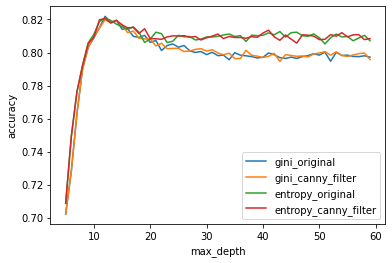

In [ ]:
max_depth = []

acc_gini_original = []
acc_gini_canny = []
acc_entropy_original = []
acc_entropy_canny = []

best = 0
best_index = 0
best_label = ''
best_Treetype = -1

# do the loop with different depth
for i in range(5,60):

  print(i)
  ########################################################################

  dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'gini'
    best_Treetype = 0

  acc_gini_original.append(sc)

  ########################################################################

  dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)

  dtree.fit(X_train_cannied, y_train)
  pred = dtree.predict(X_test_cannied)
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'gini'
    best_Treetype = 1

  acc_gini_canny.append(sc)

  ########################################################################

  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'entropy'
    best_Treetype = 0

  acc_entropy_original.append(sc)

  ########################################################################
  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)

  dtree.fit(X_train_cannied, y_train)
  pred = dtree.predict(X_test_cannied)
  sc = accuracy_score(y_test, pred)
  if(sc>=best):
    best = sc
    best_index = i
    best_label = 'entropy'
    best_Treetype = 1
  acc_entropy_canny.append(sc)
  ########################################################################

  max_depth.append(i)
# the loop is done 

d = pd.DataFrame({'acc_gini_original':pd.Series(acc_gini_original),'acc_gini_canny':pd.Series(acc_gini_canny),'acc_entropy_original':pd.Series(acc_entropy_original),'acc_entropy_canny':pd.Series(acc_entropy_canny),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini_original', data=d, label='gini_original')
plt.plot('max_depth','acc_gini_canny', data=d, label='gini_canny_filter')
plt.plot('max_depth','acc_entropy_original', data=d, label='entropy_original')
plt.plot('max_depth','acc_entropy_canny', data=d, label='entropy_canny_filter')

plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
####
print(best)
print(best_index)
print(best_label)
print(best_Treetype)

## Step Five: Evaluation of the DT with the Highest Accuracy

### 1) DT with highest accuracy (raw data)

Build the DT

In [ ]:
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=12)
best_tree.fit(X_train, y_train)
pred1 = best_tree.predict(X_test)

target_names = ['T-Shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandals','Shirt','Sneaker','Bag','Ankle boots']

Accuracy

In [ ]:
accuracy_score(y_test, pred1)

0.8207

Classification Report

In [ ]:
print("For the DT without feature engineering:")
print()
print(classification_report(y_test, pred1, target_names = target_names))

For the DT without feature engineering:

              precision    recall  f1-score   support

 T-Shirt/Top       0.74      0.81      0.77      1000
     Trouser       0.96      0.96      0.96      1000
    Pullover       0.73      0.72      0.72      1000
       Dress       0.85      0.84      0.85      1000
        Coat       0.68      0.76      0.72      1000
     Sandals       0.92      0.87      0.90      1000
       Shirt       0.62      0.53      0.57      1000
     Sneaker       0.87      0.90      0.88      1000
         Bag       0.93      0.91      0.92      1000
 Ankle boots       0.90      0.90      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



The Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, pred1))

[[811   5  19  30  14   2 108   1  10   0]
 [  7 957   2  21   4   1   7   0   1   0]
 [ 14   3 720  10 158   2  86   0   6   1]
 [ 48  19  16 842  46   1  26   0   2   0]
 [  5   2 108  49 762   0  67   0   6   1]
 [  2   1   1   1   2 868   3  61  20  41]
 [193   4 112  29 116   1 532   0  13   0]
 [  3   0   0   0   0  39   0 904   3  51]
 [ 11   2  13   6  17   7  22   7 914   1]
 [  4   0   1   0   0  18   3  72   5 897]]


### 2) DT with Feature Engineering 

In [ ]:
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=12)
best_tree.fit(X_train_cannied, y_train)
pred2 = best_tree.predict(X_test_cannied)

target_names = ['T-Shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandals','Shirt','Sneaker','Bag','Ankle boots']

In [ ]:
accuracy_score(y_test, pred2)

0.8201

In [ ]:
print("For the DT with feature engineering:")
print()
print(classification_report(y_test, pred2, target_names = target_names))

For the DT with feature engineering:

              precision    recall  f1-score   support

 T-Shirt/Top       0.73      0.81      0.77      1000
     Trouser       0.96      0.96      0.96      1000
    Pullover       0.73      0.72      0.72      1000
       Dress       0.85      0.84      0.84      1000
        Coat       0.68      0.76      0.72      1000
     Sandals       0.92      0.88      0.90      1000
       Shirt       0.62      0.53      0.57      1000
     Sneaker       0.86      0.90      0.88      1000
         Bag       0.94      0.91      0.93      1000
 Ankle boots       0.91      0.90      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [ ]:
print(confusion_matrix(y_test, pred2))

[[810   4  21  31  13   2 110   1   8   0]
 [  7 957   2  21   3   1   6   0   3   0]
 [ 15   4 718   7 161   2  85   0   7   1]
 [ 51  20  17 840  46   1  25   0   0   0]
 [  6   2 106  49 764   1  67   0   5   0]
 [  1   0   3   1   2 875   4  63  18  33]
 [198   4 109  33 117   2 526   0  11   0]
 [  0   0   0   0   0  42   0 902   3  53]
 [ 14   1  11   7  14   8  19  11 914   1]
 [  2   0   1   0   0  19   3  74   6 895]]


# **Conclusion**

1) The Default Decision Tree (gini criteration and max_depth = null) does not perform best.
  
Overall Performance: Accuracy <= 80%

Reason: since overfitting may occur in the default decision tree without pruning.


2) find the suitable parameter(criterion = 'gini' and max_depth = 12) 

3) Do the Feature Engineering, with canny filter.

4) compare the performance(accuracy) with feature engineering.

Result: there is no clear improvement made by feature engineering

Reason: For the decision with max depth, there could be pruning insides, which could avoid overfitting. Canny filter could detect edge. However, unlike CNN, DT does not pay attention to the spacial attributes. Canny filter may reduce noises. And such noises can be avoid by pruning of DT.

